In [23]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import os

import warnings

# Increase width of columns on dataframe
pd.set_option('display.max_colwidth', None)
# Ignore warnings
warnings.filterwarnings('ignore')

## Data exploration


https://www.analyticsvidhya.com/blog/2021/06/eda-exploratory-data-analysis-with-python/
https://www.kaggle.com/code/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way
https://www.analyticsvidhya.com/blog/2021/07/15-python-built-in-functions-which-you-should-know-while-learning-data-science/?utm_source=reading_list&utm_medium=https://www.analyticsvidhya.com/blog/2015/06/infographic-cheat-sheet-data-exploration-python/
https://www.kaggle.com/discussions/getting-started/254970
https://www.kaggle.com/code/datark1/eda-images-processing-and-exploration#1.-Images-metadata

In [24]:
# Load data from a CSV file into a DataFrame
df_train = pd.read_csv('../input/nlp-getting-started/train.csv')
df_test = pd.read_csv('../input/nlp-getting-started/test.csv')
# Concatenate both training and test data
data = pd.concat([df_train, df_test]).reset_index(drop=True)
data.head(30)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1.0
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1.0
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1.0
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1.0
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1.0
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1.0


In [25]:
# Fetch the general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        10876 non-null  int64  
 1   keyword   10789 non-null  object 
 2   location  7238 non-null   object 
 3   text      10876 non-null  object 
 4   target    7613 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 425.0+ KB


In [26]:
# Count unique values in a column 
df_train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

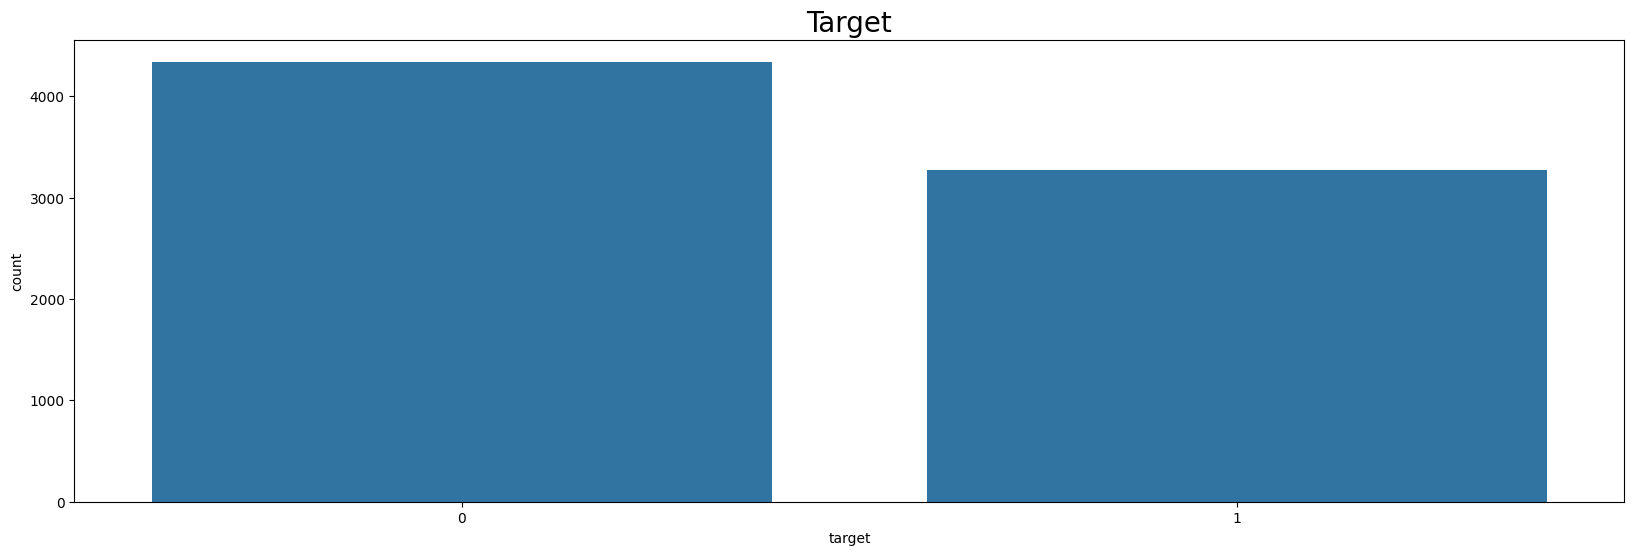

In [27]:
# Check if data is balanced
plt.figure(figsize=(20, 6))
ax = sns.countplot(x=df_train["target"])
ax.set_title("Target", fontsize=20)
plt.show()

In [28]:
# Print missing values
print(df_train.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


Note: location and keywords info is missing 

In [29]:
# Check the number of unique keywords
len(data['keyword'].unique())

222

In [30]:
# Print unique keywords
data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

Note: keywords may need cleaning

In [31]:
# Count a number of unique values for every keyword 
data['keyword'].value_counts()

keyword
ablaze                   50
lava                     50
loud%20bang              50
mass%20murder            50
massacre                 50
                         ..
forest%20fire            24
threat                   16
radiation%20emergency    14
inundation               14
epicentre                13
Name: count, Length: 221, dtype: int64

Note: disasters connected with water, fire, earthquakes, radiation - natural disasters
Conclusion: may need Topic Modelling with BERT for short-length text to identify areas  

In [32]:
# Count the num of locations
len(data['location'].unique())

4522

In [33]:
# Print out unique locations
locations = df_train['location'].unique().tolist()
print(locations)

[nan, 'Birmingham', 'Est. September 2012 - Bristol', 'AFRICA', 'Philadelphia, PA', 'London, UK', 'Pretoria', 'World Wide!!', 'Paranaque City', 'Live On Webcam', 'milky way', 'GREENSBORO,NORTH CAROLINA', 'England.', 'Sheffield Township, Ohio', 'India', 'Barbados', 'Anaheim', 'Abuja', 'USA', 'South Africa', 'Sao Paulo, Brazil', 'hollywoodland ', 'Edmonton, Alberta - Treaty 6', 'Inang Pamantasan', 'Twitter Lockout in progress', 'Concord, CA', 'Calgary, AB', 'San Francisco', 'CLVLND', 'Nashville, TN', 'Santa Clara, CA', 'UK', 'St. Louis, MO', 'Walker County, Alabama', 'Australia', 'North Carolina', 'Norf Carolina', 'San Mateo County, CA', 'Njoro, Kenya', "Your Sister's Bedroom", 'Arlington, TX', 'South Bloomfield, OH', 'New Hanover County, NC', 'Maldives', 'Manchester, NH', 'Wilmington, NC', 'global', 'Alberta | Sask. | Montana', 'Charlotte', 'Baton Rouge, LA', 'Hagerstown, MD', 'Gloucestershire , UK', 'Nairobi, Kenya', 'Instagram - @heyimginog ', '304', 'Switzerland', 'US', 'Somewhere Onl

Note: location column may need cleaning (punctuations e.g. !!, | ,etc., digits if not lantitude, irrelevant or too general info e.g. 'milky way', 'Twitter Lockout in progress', "Your Sister's Bedroom", 'VISIT MY YOUTUBE CHANNEL.', etc.)

'y(our) boyfriends legs '
Somewhere Out There, not , a resident, 92, Worldwide happily Married with 2 kids, VISIT MY YOUTUBE CHANNEL, VISIT MY YOUTUBE CHANNEL. the own zone layer
Views From The Six, Swaning Around, Wild Wild Web, physically, Yeezy Taught Me , BIG D

In [34]:
# Check one tweet
df_train['text'][32]

'We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw'

In [35]:
# Count a num of unique tweets
len(df_train['text'].unique())

7503

In [36]:
# Print the longest tweet
print("The longest tweet has: {} words".format(df_train['text'].apply(lambda x : len(x.split())).max()))

The longest tweet has: 31 words


In [37]:
# Print the shortest tweet
print("The shortest tweet has: {} words".format(df_train['text'].apply(lambda x : len(x.split())).min()))

The shortest tweet has: 1 words


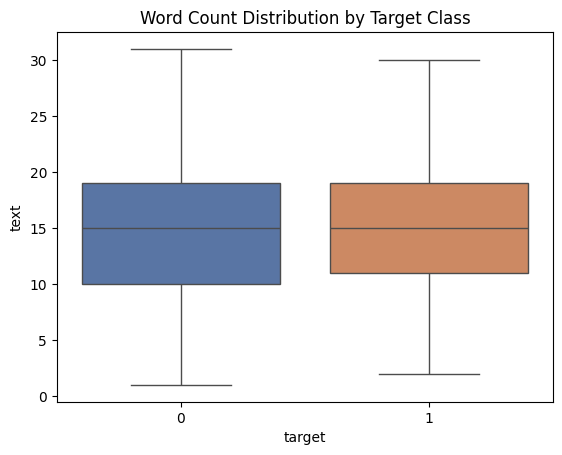

In [38]:
# Visualize length of tweets
sns.boxplot(data=df_train, x='target', y=df_train["text"].apply(lambda x : len(x.split())), palette='deep')
plt.title("Word Count Distribution by Target Class")
plt.show()

NOTE: there are no outliers 